# Load Data


In [1]:
# !pip install tensorflow opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 MB 22.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 26.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 23.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 20.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.8/599.8 kB 10.8 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
import os

2025-02-18 11:37:25.631097: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x104edce50>>
Traceback (most recent call last):
  File "/Users/jonathanamsalem/micromamba/envs/deep-learning/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [5]:
# avoid OOM errors by setting GPU memoty consumnptio growth
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)  #keep memory to a minimal

In [9]:
# !pip install kagglehub
import kagglehub
# Download latest version
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

print("Path to dataset files:", path)

100%|██████████| 86.8M/86.8M [00:04<00:00, 20.4MB/s]

Extracting files...


Path to dataset files: /Users/jonathanamsalem/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2


In [22]:

!mv {path} ./brain-tumor-classification-mri




In [23]:
meningioma__path_train = 'brain-tumor-classification-mri/Training/meningioma_tumor'
meningioma__path_test = 'brain-tumor-classification-mri/Testing/meningioma_tumor'
no_tumor__path_train = 'brain-tumor-classification-mri/Training/no_tumor'
no_tumor__path_test =  'brain-tumor-classification-mri/Testing/no_tumor'

In [ ]:
#Remove bad images
import cv2
import imghdr

image_exts = ['jpeg', 'jpg', 'bmp', 'png']


<ipython-input-9-ce1f712ca804>:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:

#Remove images that are not compatible with extensions array
def check_img_ext(dir):
  for image in os.listdir(dir):
    image_ext = imghdr.what(os.path.join(dir, image))
    if image_ext not in image_exts:
      print("removing:",  image)
      os.remove(os.path.join(dir, image))
  print("Completed image checks")


check_img_ext(meningioma__path_train)
check_img_ext(meningioma__path_test)
check_img_ext(no_tumor__path_train)
check_img_ext(no_tumor__path_test)



Completed image checks
Completed image checks
Completed image checks
Completed image checks


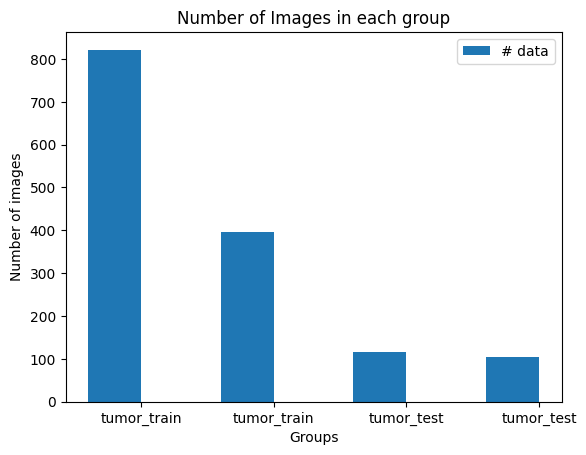

In [ ]:
#Plot # of data points per folder

import numpy as np
import matplotlib.pyplot as plt

X = ['tumor_train','tumor_train','tumor_test','tumor_test']
Y = [len(os.listdir(meningioma__path_train)),len(os.listdir(no_tumor__path_train)),len(os.listdir(meningioma__path_test)),len(os.listdir(no_tumor__path_test))]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Y, 0.4, label = '# data')
plt.xlabel("Groups")
plt.ylabel("Number of images")
plt.xticks(X_axis, X)
plt.title("Number of Images in each group")
plt.legend()
plt.show()


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Define the ImageDataGenerator for augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Get list of all image files in the directory
image_files = [f for f in os.listdir(no_tumor__path_train) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
original_image_count = len(image_files)

i = 0
for image_name in image_files:
    img_path = os.path.join(no_tumor__path_train, image_name)

    # Load the image
    img = load_img(img_path)

    # Convert image to a numpy array
    img_array = img_to_array(img)

    # Reshape the image to fit the expected input format (batch_size, height, width, channels)
    img_array = img_array.reshape((1,) + img_array.shape)

    # Apply augmentations and save the new image (just one augmentation per image)
    for _ in datagen.flow(img_array, batch_size=1, save_to_dir=no_tumor__path_train, save_prefix="aug", save_format="jpg"):
        i += 1
        break  # Only one augmented image per original image

    # Break outer loop if stopping condition is met
    if i >= original_image_count:  # Stop after augmenting all images once
        break

print("Augmentation complete! New image count:", len(os.listdir(no_tumor__path_train)))



Augmentation complete! New image count: 785


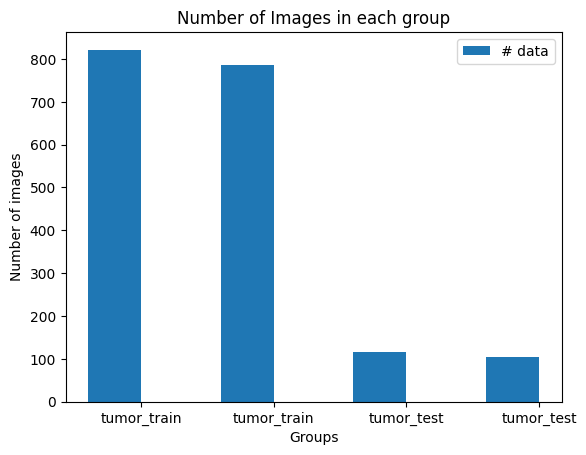

In [ ]:
#Plot # of data points per folder

import numpy as np
import matplotlib.pyplot as plt

X = ['tumor_train','tumor_train','tumor_test','tumor_test']
Y = [len(os.listdir(meningioma__path_train)),len(os.listdir(no_tumor__path_train)),len(os.listdir(meningioma__path_test)),len(os.listdir(no_tumor__path_test))]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Y, 0.4, label = '# data')
plt.xlabel("Groups")
plt.ylabel("Number of images")
plt.xticks(X_axis, X)
plt.title("Number of Images in each group")
plt.legend()
plt.show()

In [ ]:
# Load data into pipeline
import numpy as np

import tensorflow as tf

import tensorflow as tf

desired_classes = ['no_tumor', 'meningioma_tumor']
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'brain-tumor-classification-mri/Training/',
    class_names=desired_classes,
    label_mode='int',
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    'brain-tumor-classification-mri/Testing/',
    class_names=desired_classes,
    label_mode='int',
)




Found 1607 files belonging to 2 classes.
Found 220 files belonging to 2 classes.


In [ ]:
#dataset is not preloaded into memory so we need to grab the data on the fly
data_iterator = train_dataset.as_numpy_iterator() #access generator from data pipeline



In [ ]:
batch = data_iterator.next() #grab next batch of data

In [ ]:
len(batch) #images and labels.

2

In [ ]:
batch[0].shape #32 images, 256x256. 3 channels

(32, 256, 256, 3)

In [ ]:
batch[1] #tumor or no tumor

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

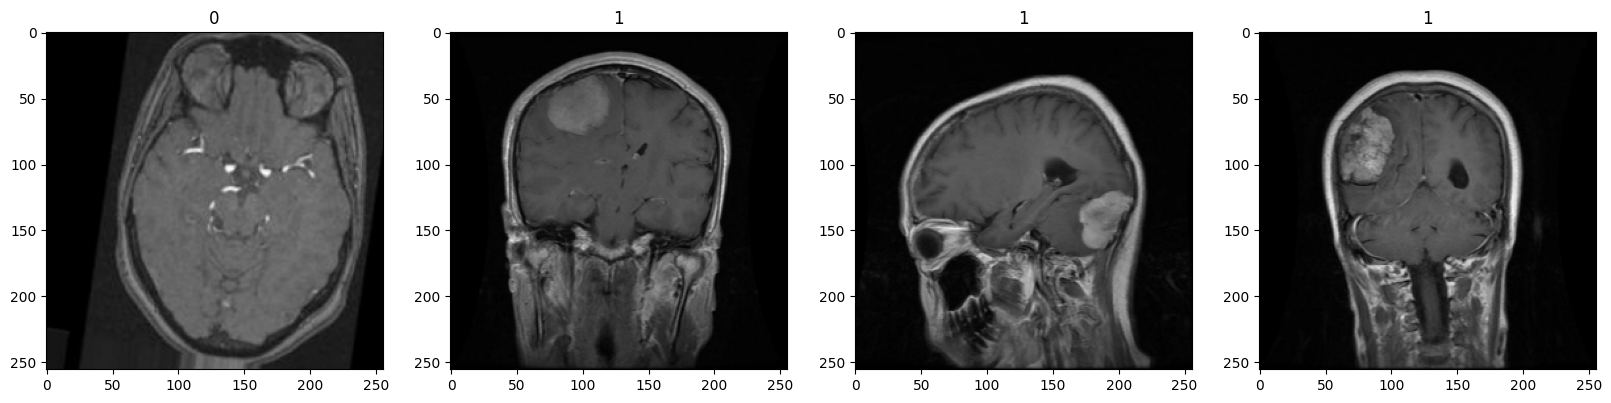

In [ ]:
fig ,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

  #0 no tumor, 1 tumor

#Pre-Processing

In [ ]:
#Scale the data to 0-1 to optimize faster. Transform data in pipeline
train_dataset = train_dataset.map(lambda x,y: (x/255, y))
test_dataset = test_dataset.map(lambda x,y: (x/255, y))


#Build Model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

#maxpooling - condesning layer. avoid returning all data from convolutional and condese it down
#dropout regularization

In [ ]:
#Form the architecture

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) #16 filters of dimension 3x3. stride of 1.
model.add(MaxPooling2D()) #pooling layer


model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu')) #256 to bring back to image size
model.add(Dense(1, activation='sigmoid')) #binary classification 0 or 1.



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

#first conv layer takes in 256-256 to then 254 264. Pooling converts to 127
#conv 2 covners to 125 and then pooling coverts to 62.
# conv3 convcerts to 60 and then pooling converts to 30
# flatter gets 14400 values. Max pooling conveted to 1D.
#dense has 256 neurons and then output layer has 1 neuron

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

#Train Model


In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #keep logs or leave at a checkpoint



In [ ]:
#fit the model
train_data_shuffled = train_dataset.shuffle(buffer_size=len(train_dataset))
validation = train_data_shuffled.take(int(0.2*len(train_data_shuffled)))
train = train_data_shuffled.skip(int(0.2*len(train_data_shuffled)))

hist = model.fit(train, epochs=5, validation_data=validation,callbacks=[tensorboard_callback] )

Epoch 1/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - accuracy: 0.6761 - loss: 0.6220 - val_accuracy: 0.9187 - val_loss: 0.2423
Epoch 2/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 146ms/step - accuracy: 0.8604 - loss: 0.2753 - val_accuracy: 0.9062 - val_loss: 0.2412
Epoch 3/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9086 - loss: 0.2034 - val_accuracy: 0.9625 - val_loss: 0.0926
Epoch 4/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - accuracy: 0.9553 - loss: 0.1112 - val_accuracy: 0.9763 - val_loss: 0.0679
Epoch 5/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9706 - loss: 0.0833 - val_accuracy: 0.9844 - val_loss: 0.0623


In [ ]:
hist.history

{'accuracy': [0.7621951103210449,
  0.8772338628768921,
  0.9285159111022949,
  0.9542682766914368,
  0.9650349617004395],
 'loss': [0.5065613985061646,
  0.27334538102149963,
  0.17136317491531372,
  0.10984891653060913,
  0.08443264663219452],
 'val_accuracy': [0.918749988079071,
  0.90625,
  0.9624999761581421,
  0.9762712121009827,
  0.984375],
 'val_loss': [0.24227651953697205,
  0.2411738932132721,
  0.09263657033443451,
  0.06793369352817535,
  0.06231856346130371]}

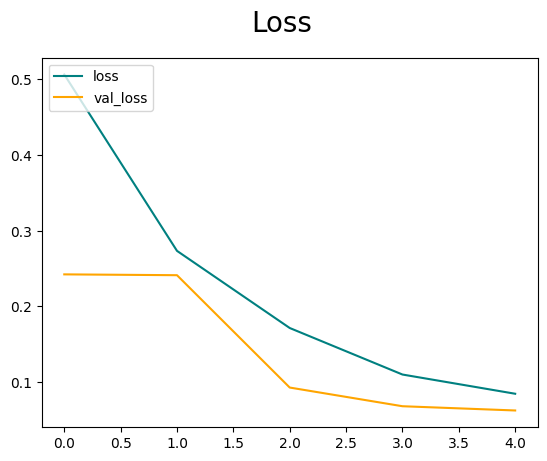

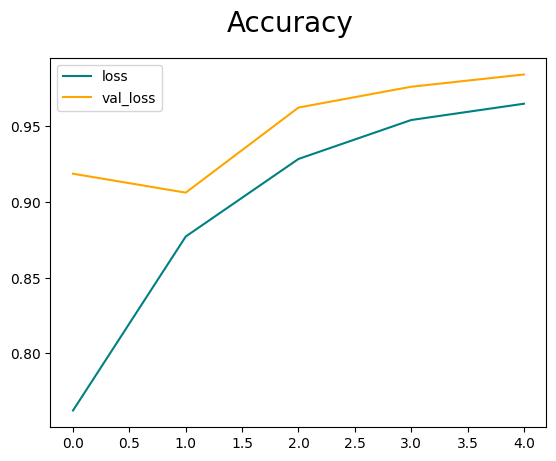

In [ ]:
#plot performance

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


#plot performance

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


#Test Data

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test_dataset.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X) #betwween 0 and 1 (sigmoid activation)
  pre.update_state(y, yhat) #update percision
  re.update_state(y, yhat) #update recall
  acc.update_state(y, yhat)#update accuracy



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 0.747826099395752, Accuracy: 0.8681818246841431


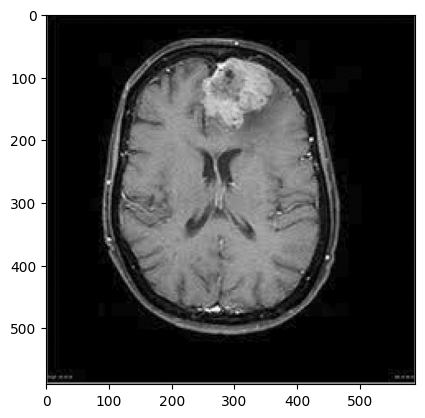

In [ ]:
#Test on random data
import cv2
img = cv2.imread('/content/test_image.jpg')
plt.imshow(img)
plt.show()


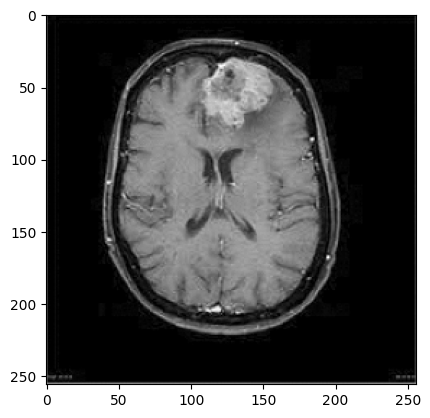

In [ ]:
resize = tf.image.resize(img, (256,256)) #model expectes 256x256
plt.imshow(resize.numpy().astype(int))
plt.show()



In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0)) #expand dims to pass 1 image since model expects batch. Expand dimension 0. Put it in a list

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


In [ ]:
yhat #1 predicts meningioma

array([[0.07281344]], dtype=float32)

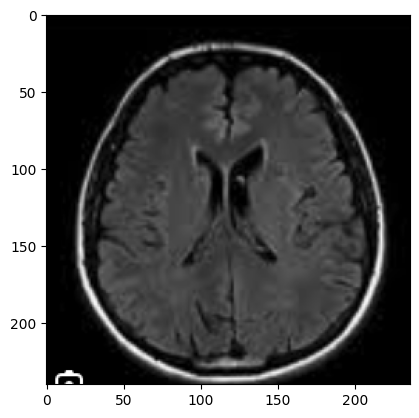

In [ ]:
import cv2
img2 = cv2.imread('/content/Screenshot 2025-02-08 at 12.01.46 PM.png')
plt.imshow(img2)
plt.show()


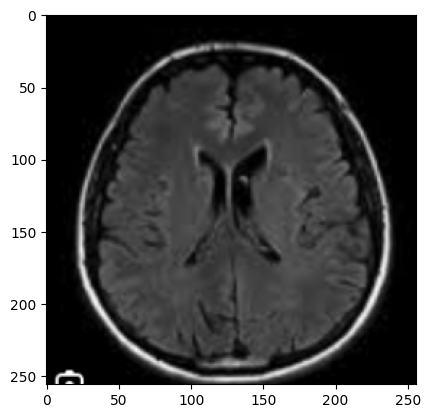

In [ ]:
resize2 = tf.image.resize(img2, (256,256)) #model expectes 256x256
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [ ]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0)) #expand dims to pass 1 image since model expects batch. Expand dimension 0. Put it in a list

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
yhat2

array([[0.00037232]], dtype=float32)

# Save the model

In [ ]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models','meningioma_tumor.h5')) #serialize model to store on disk


# Load Model and Make Predictions

In [ ]:
new_model = load_model(os.path.join('models','meningioma_tumor.h5'))

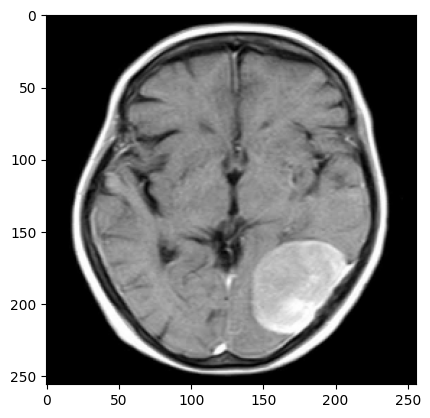

In [ ]:
img3 = cv2.imread('/content/brain-tumor-classification-mri/Testing/meningioma_tumor/image(106).jpg')

resize3 = tf.image.resize(img3, (256,256)) #model expectes 256x256
plt.imshow(resize3.numpy().astype(int))
plt.show()


In [ ]:
new_model.predict(np.expand_dims(resize3/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.82712734]], dtype=float32)